In [10]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

npseed = 4321

In [11]:
data = pd.read_csv('/content/sample_data/challenge_1_gut_microbiome_data.csv', error_bad_lines = False)

#replacing disease value by a number 0 being healthy
data['disease'] = data['disease'].replace(['Healthy'],'0') 
data['disease'] = data['disease'].replace(['Disease-1'],'1') 
data['disease'] = data['disease'].replace(['Disease-2'],'2') 
data['disease'] = data['disease'].replace(['Disease-3'],'3') 

#drop column with sample name
data = data.drop(data.columns[0], axis=1)
data.reset_index(drop=True, inplace=True)
data = data.astype(float) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
data = data.to_numpy()
x, y = data[:,:-1], data[:,-1]


In [13]:
#split is 75% training 25% test 

(X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.75, random_state=183)


In [14]:
#test for best random state 
def random_state(random_state):

  (X_train, X_test, y_train, y_test) = train_test_split(x, y, train_size=0.75,random_state = random_state)

  clf = DecisionTreeClassifier(criterion = 'entropy' , random_state = 1,
                               max_depth=14, min_samples_leaf=5)

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return f1_score(y_test,y_pred, average='weighted')*100


In [15]:
#test for best max depth
def test_max_depth(max_depth):

  clf = DecisionTreeClassifier(criterion = 'entropy' , random_state = 1,
                               max_depth=max_depth, min_samples_leaf=5)

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return f1_score(y_test,y_pred, average='weighted')*100


<function matplotlib.pyplot.show>

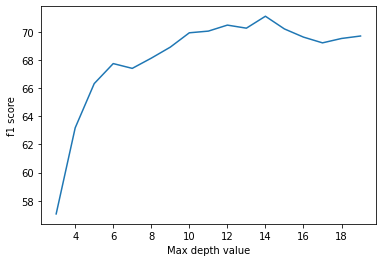

In [16]:
# plot depth vs f1 score 
depth_scores = {}
for i in range (3,20):
 depth_scores[i] = test_max_depth(i)

plt.plot(list(depth_scores.keys()),list(depth_scores.values()))
plt.xlabel("Max depth value")
plt.ylabel("f1 score")
plt.show

In [17]:
#here we see random state value testing in action
max = 0
best_state = 0
for i in range (30,200):
  score = random_state(i)
  if (score > max):
      max = score
      best_state = i

print("best random state is %d" % best_state)

best random state is 183


In [18]:
#test between gini and entropy
def test_criterion(criterion):

  clf = DecisionTreeClassifier(criterion = criterion , random_state = 1,
                               max_depth=14)

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print ("Accuracy using %s criterion is %f" %(criterion, accuracy_score(y_test,y_pred)*100))
  print ("F1 using %s criterion is %f" %(criterion, f1_score(y_test,y_pred, average='weighted')*100))
  print ("Cohen Kappa using %s criterion is %f" % (criterion, cohen_kappa_score(y_test,y_pred)*100))

In [19]:
test_criterion("gini")
test_criterion("entropy")

Accuracy using gini criterion is 72.474613
F1 using gini criterion is 71.031825
Cohen Kappa using gini criterion is 56.059684
Accuracy using entropy criterion is 71.619455
F1 using entropy criterion is 70.549879
Cohen Kappa using entropy criterion is 55.197593
